In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import string
import random
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [15]:
df = pd.read_csv("salarios-ciencia-dados-v2.csv")
df

,Unnamed: 0,nivel_experiencia,tipo_emprego,titulo_trabalho,salario_em_dolar,residencia_empregado,percentual_remoto,local_empresa,tamanho_empresa
0,0,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,3,SE,FT,Data Scientist,175000,CA,100,CA,M
2,4,SE,FT,Data Scientist,120000,CA,100,CA,M
3,5,SE,FT,Applied Scientist,222200,US,0,US,L
4,6,SE,FT,Applied Scientist,136000,US,0,US,L
...,...,...,...,...,...,...,...,...,...
3730,3749,SE,FT,Data Specialist,165000,US,100,US,L
3731,3750,SE,FT,Data Scientist,412000,US,100,US,L
3732,3751,MI,FT,Principal Data Scientist,151000,US,100,US,L
3733,3752,EN,FT,Data Scientist,105000,US,100,US,S


In [6]:
df.describe()

,Unnamed: 0,salario_em_dolar,percentual_remoto
count,3735.000000,3735.000000,3735.000000
mean,1873.111914,137864.596252,46.077644
std,1081.738418,62713.864109,48.601319
min,0.000000,5132.000000,0.000000
25%,937.500000,95000.000000,0.000000
50%,1871.000000,135000.000000,0.000000
75%,2809.500000,175000.000000,100.000000
max,3754.000000,450000.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            3735 non-null   int64 
 1   nivel_experiencia     3735 non-null   object
 2   tipo_emprego          3735 non-null   object
 3   titulo_trabalho       3735 non-null   object
 4   salario_em_dolar      3735 non-null   int64 
 5   residencia_empregado  3735 non-null   object
 6   percentual_remoto     3735 non-null   int64 
 7   local_empresa         3735 non-null   object
 8   tamanho_empresa       3735 non-null   object
dtypes: int64(3), object(6)
memory usage: 262.7+ KB


##### 1 A

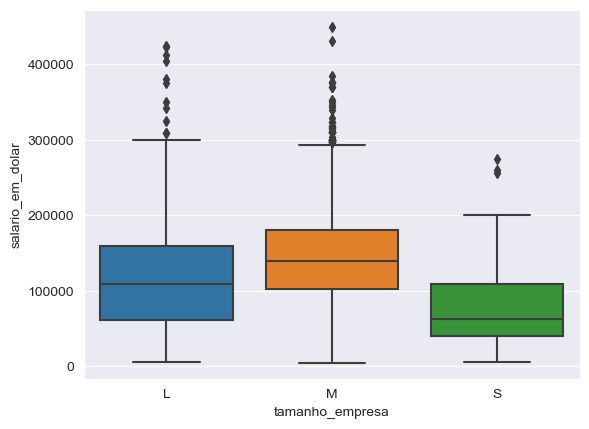

In [10]:
sns.boxplot(x="tamanho_empresa", y="salario_em_dolar", data=df)
plt.show()

#### Empresas de tamanho L: O boxplot detalha que as empresas de tamanho L possuem uma mediana pouco acima de 100000, possuindo alguns outliers, além de ser bem homogêneo. A distribuição de salários anual da empresa de tamanho L é menor que a distribuição de salários anual da empresa de tamanho M e maior que a distribuição de salários anual da empresa de tamanho S.
#### Empresas de tamanho M: O boxplot detalha que as empresas de tamanho M possuem uma mediana entre 100000 e 200000, possuindo alguns outliers e sendo bem homogêneo. A distribuição é maior que a de S e L.

#### Empresas de tamanho S: O boxplot detalha que as empresas de tamanho S possuem uma mediana entre 0 e 100000, possuindo alguns outliers e não é muito homogêneo. A distribuição é menor que a de L e M.

#### Conclusão: empresas de tamanho M são mais bem remuneradas, seguidas pelas empresas de tamanho L e por fim as empresas de tamanho S.

##### 1B

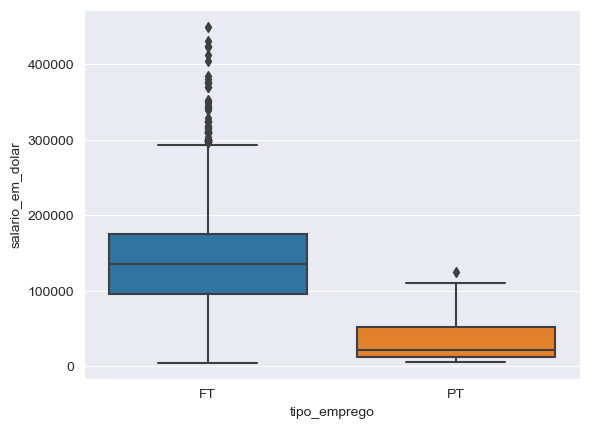

In [19]:
sns.boxplot(x="tipo_emprego" , y="salario_em_dolar", data=df)
plt.show()

#### A partir desses boxplots, fica claro que os empregos FT (Full Time) possuem um salário maior que os empregos PT (Part Time), é bem homogeneo e possui alguns outliers. Os empregos PT possui apenas um outlier e não é homogêneo

#### Conclusão: trabalho Full Time são mais bem remunerados

##### 1C

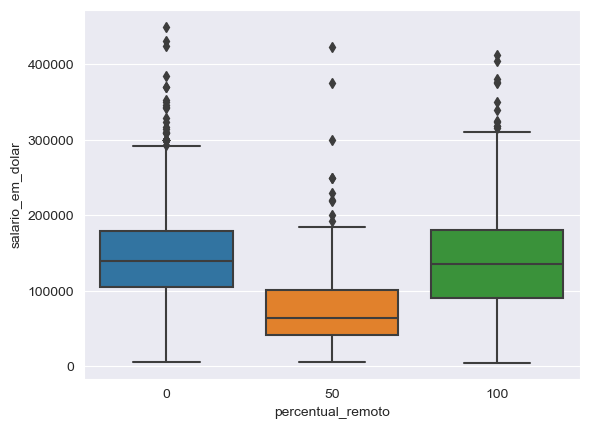

In [20]:
sns.boxplot(x="percentual_remoto" , y="salario_em_dolar", data=df)
plt.show()

#### 0 percentual: Boxplot homogêneo, mediana próxima de 150000, alguns outliers e distibuição maior que 50 e parecida com a de 100, sendo um pouquinho superior.

#### 50 percentual: Boxplot não muito homogêneo, mediana próxima de 50000, alguns outliers (mais espaçados) e distibuição menor que 0 e 100.

#### 100 percentual: Boxplot homogêneo, mediana próxima de 150000, alguns outliers e distibuição maior que 0 e parecida com a de 0, sendo um pouquinho inferior.

#### Conclusão: pessoas que trabalham em percentual remoto de 50, tendem a receber salárioa anuais menores

##### 1D

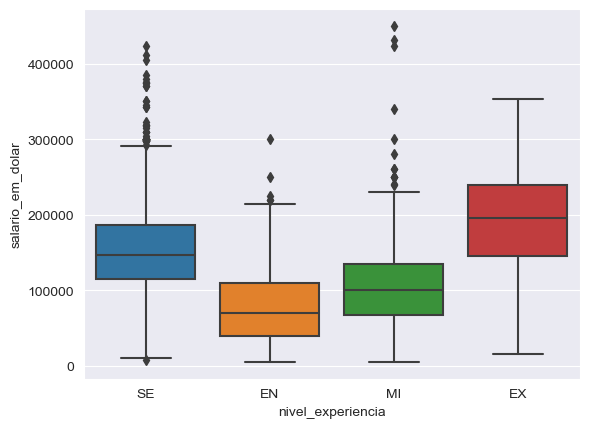

In [21]:
sns.boxplot(x="nivel_experiencia" , y="salario_em_dolar", data=df)
plt.show()

#### SE (Sênior): Boxplot homogêneo, mediana próxima de 150000, alguns outliers e distibuição maior que EN, MI e menor que EX
#### EN (Iniciante): Boxplot homogêneo, mediana próxima de 50000, alguns outliers e distibuição menor que todas
#### MI (Intermediário): Boxplot homogêneo, mediana próxima de 100000, alguns outliers e distibuição maior que EN e menor que SE e EX
#### EX (Experiente): Boxplot homogêneo, mediana próxima de 200000, nenhum outlier e distibuição maior que todas
#### Conclusão: Cargos mais bem remunerados são os de nível Experiente, seguidos pelos de nível Sênior, Intermediário e por fim Iniciante

#### QUESTÃO 2

#### Critério: para o agrupamento, as colunas utilizadas foram nivel_experiencia, tipo_emprego, tamanho_empresa e percentual_remoto. O target foi o salário em dólar.

#### A príncipo, as colunas titulo_trabalho, residencia_empregado, local_empresa não foram consideradas pela quantidade de dados únicos.


#### 2A

In [85]:
# Cópia do dataframe
dfcopy = df.copy()

# Convertendo os dados categóricos para numéricos
dfcopy['nivel_experiencia'] = dfcopy['nivel_experiencia'].map({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})
dfcopy['tipo_emprego'] = dfcopy['tipo_emprego'].map({'PT': 1, 'FT': 2})
dfcopy['tamanho_empresa'] = dfcopy['tamanho_empresa'].map({'S': 1, 'M': 2, 'L': 3})
dfcopy['percentual_remoto'] = dfcopy['percentual_remoto'].map({0: 1, 50: 2, 100: 3})

# Colunas que serão utilizadas para o agrupamento
colunas = ['nivel_experiencia', 'tipo_emprego', 'tamanho_empresa', 'percentual_remoto']
target = ['salario_em_dolar']

In [86]:
# Aplicando KMeans

# 2 clusters
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(dfcopy[colunas])

# 3 clusters
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(dfcopy[colunas])

# 4 clusters
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(dfcopy[colunas])

C:\Users\Miguel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Miguel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Miguel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [87]:
from sklearn.metrics import silhouette_score

silhouette2 = silhouette_score(dfcopy[colunas], kmeans2.labels_)
silhouette3 = silhouette_score(dfcopy[colunas], kmeans3.labels_)
silhouette4 = silhouette_score(dfcopy[colunas], kmeans4.labels_)
print(silhouette2)
print(silhouette3)
print(silhouette4)

0.6265573557420119
0.6507585885153199
0.7063990764938428


#### O melhor valor de silhueta foi o de 4 clusters, com 0.706. (SIlhouette: A técnica fornece uma representação sucinta de quão bem cada objeto foi classificados

#### 2B

In [134]:
# qual a media do saslario de cada grupo do melhor agrupamento

dfGRUPO1 = dfcopy[kmeans4.labels_ == 0]
dfGRUPO2 = dfcopy[kmeans4.labels_ == 1]
dfGRUPO3 = dfcopy[kmeans4.labels_ == 2]
dfGRUPO4 = dfcopy[kmeans4.labels_ == 3]

print('GRUPO 1', dfGRUPO1['salario_em_dolar'].mean())
print('GRUPO 2', dfGRUPO2['salario_em_dolar'].mean())
print('GRUPO 3', dfGRUPO3['salario_em_dolar'].mean())
print('GRUPO 4', dfGRUPO4['salario_em_dolar'].mean())


GRUPO 1 112132.79356060606
GRUPO 2 153520.89549180327
GRUPO 3 156700.88879310346
GRUPO 4 84374.83704974271


,Unnamed: 0,nivel_experiencia,tipo_emprego,titulo_trabalho,salario_em_dolar,residencia_empregado,percentual_remoto,local_empresa,tamanho_empresa
17,19,6,2,Data Analyst,150000,US,3,US,2
18,20,6,2,Data Analyst,110000,US,3,US,2
37,39,6,2,Data Quality Analyst,100000,NG,3,NG,3
38,40,6,2,Compliance Data Analyst,30000,NG,3,NG,3
39,41,6,2,Machine Learning Engineer,20984,IN,2,IN,3
...,...,...,...,...,...,...,...,...,...
3727,3746,6,2,Data Scientist,119059,SG,3,IL,2
3728,3747,6,2,Applied Machine Learning Scientist,423000,US,2,US,3
3729,3748,6,2,Data Engineer,28369,MT,2,MT,3
3732,3751,6,2,Principal Data Scientist,151000,US,3,US,3


#### Houve diferenças entre os grupos sim, principalmente o último.

In [90]:
from sklearn.model_selection import train_test_split


# 70% terinamento 30% teste


dfcopy['nivel_experiencia'] = dfcopy['nivel_experiencia'].replace(3, 0) # Senior
dfcopy['nivel_experiencia'] = dfcopy['nivel_experiencia'].replace(4, 0) # Senior
dfcopy['nivel_experiencia'] = dfcopy['nivel_experiencia'].replace(1, 6) # Junior
dfcopy['nivel_experiencia'] = dfcopy['nivel_experiencia'].replace(2, 6) # Junior

# Ou seja: 0 = Senior, 6 = Junior

dfX = dfcopy[['tipo_emprego', 'tamanho_empresa', 'percentual_remoto']]
dfY = dfcopy[['nivel_experiencia']]

X_train, X_test, Y_train, Y_test = train_test_split(
    dfX,
    dfY,
    test_size=0.3,
    random_state=0
)

In [91]:
# Aplicando KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

#KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred_KNN = knn.predict(X_test)
print(classification_report(Y_test, Y_pred_KNN))

              precision    recall  f1-score   support

           0       0.72      0.99      0.84       796
           6       0.83      0.06      0.11       325

    accuracy                           0.72      1121
   macro avg       0.78      0.53      0.48      1121
weighted avg       0.75      0.72      0.63      1121



C:\Users\Miguel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [92]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred_DT = dt.predict(X_test)
print(classification_report(Y_test, Y_pred_DT))


              precision    recall  f1-score   support

           0       0.75      0.97      0.84       796
           6       0.70      0.19      0.30       325

    accuracy                           0.74      1121
   macro avg       0.72      0.58      0.57      1121
weighted avg       0.73      0.74      0.68      1121



In [93]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_NB = nb.predict(X_test)
print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

           0       0.72      1.00      0.83       796
           6       1.00      0.02      0.05       325

    accuracy                           0.72      1121
   macro avg       0.86      0.51      0.44      1121
weighted avg       0.80      0.72      0.61      1121



C:\Users\Miguel\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
# Adicionando coluna salario_em_dolar ao treinamento

dfY = dfcopy[['nivel_experiencia']]

dfX = dfcopy[['tipo_emprego', 'tamanho_empresa', 'percentual_remoto', 'salario_em_dolar']]
dfY = dfcopy[['nivel_experiencia']]

X_train, X_test, Y_train, Y_test = train_test_split(
    dfX,
    dfY,
    test_size=0.3,
    random_state=0
)

In [102]:
# Aplicando KNN

#KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred_KNN = knn.predict(X_test)
print(classification_report(Y_test, Y_pred_KNN))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       796
           6       0.63      0.58      0.60       325

    accuracy                           0.78      1121
   macro avg       0.73      0.72      0.73      1121
weighted avg       0.78      0.78      0.78      1121



C:\Users\Miguel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [103]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred_DT = dt.predict(X_test)
print(classification_report(Y_test, Y_pred_DT))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       796
           6       0.63      0.56      0.60       325

    accuracy                           0.78      1121
   macro avg       0.73      0.71      0.72      1121
weighted avg       0.77      0.78      0.77      1121



In [104]:
# Naive Bayes

nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_NB = nb.predict(X_test)
print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       796
           6       0.68      0.41      0.51       325

    accuracy                           0.77      1121
   macro avg       0.74      0.67      0.68      1121
weighted avg       0.76      0.77      0.75      1121



C:\Users\Miguel\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
# Remoção tipo_emprego

dfX = dfcopy[['tamanho_empresa', 'percentual_remoto']]
dfY = dfcopy[['nivel_experiencia']]
X_train, X_test, Y_train, Y_test = train_test_split(
    dfX,
    dfY,
    test_size=0.3,
    random_state=0
)


In [126]:

# Aplicando KNN

#KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred_KNN = knn.predict(X_test)
print(classification_report(Y_test, Y_pred_KNN))


              precision    recall  f1-score   support

           0       0.72      0.99      0.83       796
           6       0.78      0.04      0.08       325

    accuracy                           0.72      1121
   macro avg       0.75      0.52      0.46      1121
weighted avg       0.74      0.72      0.62      1121



C:\Users\Miguel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [127]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred_DT = dt.predict(X_test)
print(classification_report(Y_test, Y_pred_DT))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84       796
           6       0.67      0.31      0.42       325

    accuracy                           0.76      1121
   macro avg       0.72      0.62      0.63      1121
weighted avg       0.74      0.76      0.72      1121



In [128]:
# Naive Bayes

nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_NB = nb.predict(X_test)
print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       796
           6       0.62      0.32      0.42       325

    accuracy                           0.74      1121
   macro avg       0.69      0.62      0.63      1121
weighted avg       0.72      0.74      0.72      1121



C:\Users\Miguel\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### RESULTADOS

**QUESTÃO A)** O melhor foi o **KNN (COM ADIÇÃO DA COLUNA salario_anual)** com uma **acurácia** de 0.78, que significa que 78% das previsões foram corretas.
O **f1-score**, que indica a média harmônica entre **PRESIÇÃO** (quantidade de vezes que o seu modelo acerta em relação ao total de vezes que ele tenta acertar) e **RECALL** (O recall mede a quantidade de vezes que o seu modelo acerta em relação ao total de vezes que ele deveria ter acertado) foi de 0.85 para a classe 0 (Senior) e 0.60 para a classe 6 (Junior).

**CONCLUSÃO** = MELHOR: KNN (COM ADIÇÃO DA COLUNA salario_anual)
                PORQUE: Acurácia superio e fi-score superior.
                MOTIVO: salário é uma boa métrica para definir o nível de experiência de um profissional.

C:\Users\Miguel\AppData\Local\Temp\ipykernel_11204\190209895.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfcopy.corr(), annot=True)


<Axes: >

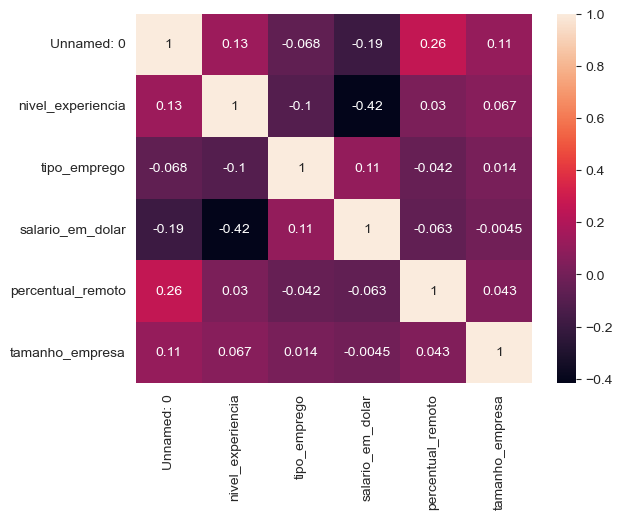

In [129]:
#matriz correlacao sns

import seaborn as sns

sns.heatmap(dfcopy.corr(), annot=True)

**QUESTÃO B)** Com certeza o **salario_anual**, o que é possível ser conferido devido a correlação entre as variáveis, salario_anual e tipo_emprego que é uma correlação negativa, ou seja, quanto menor o salário, o valor será 6 que é da classe **'JUNIOR'** e quanto maior o salário, o valor será 0 que é da classe **'SENIOR'**.
        O **tipo_emprego** influenciou, mas bem pouco, com 0.11.

**QUESTÂO C)** Acurácia, com certeza. Porque ela indica a porcentagem de acertos do modelo, ou seja, quanto maior a acurácia, melhor o modelo.